# Principal Component Analysis

## Variance explained by PCs
The first PC captures ~69% of the variance in the data.  
The second PC captures ~19% of the variance.  
The first two PCs capture > 88% of the variance in the data. 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

penguins_all = pd.read_csv('penguins_af.csv')

In [2]:
penguins_all.columns

Index(['Unnamed: 0', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [3]:
penguins_all

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...,...
328,339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
329,340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
330,341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
331,342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [4]:
species_names=['Adelie','Chinstrap','Gentoo']

X = penguins_all[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']]
y = penguins_all['species']

# Scale input features to N(0,1)
X_scal = StandardScaler().fit_transform(X)

pca = PCA(n_components=4)
X_r = pca.fit(X_scal).transform(X_scal)

# Proportion of variance explained for each components
pca.explained_variance_ratio_

array([0.68633893, 0.19452929, 0.09216063, 0.02697115])

/opt/anaconda3/envs/AI/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


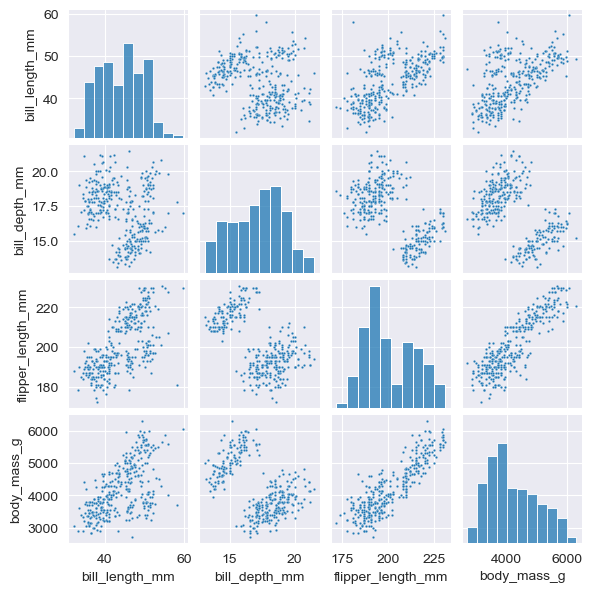

In [5]:
import seaborn as sna
sna.pairplot(X, height=1.5, plot_kws=dict(s=3))

/opt/anaconda3/envs/AI/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


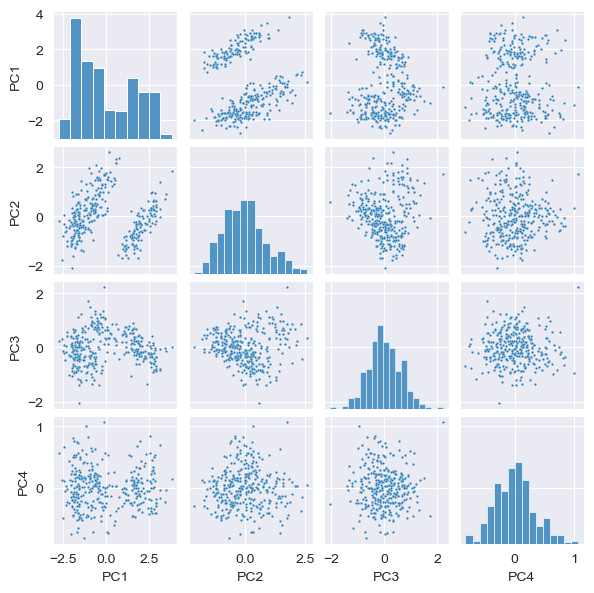

In [6]:
X_r_df = pd.DataFrame(X_r, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
sna.pairplot(X_r_df, height = 1.5, plot_kws=dict(s=3))

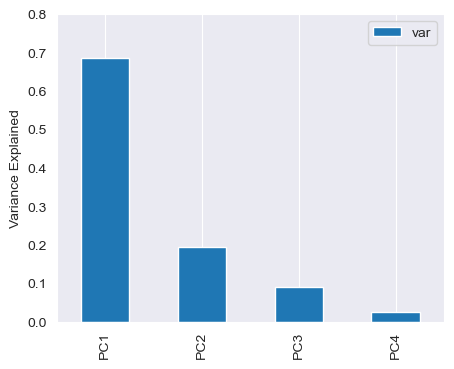

In [7]:
df = pd.DataFrame(pca.explained_variance_ratio_, 
                  index=['PC1','PC2','PC3','PC4'],columns =['var'])

pl = df.plot.bar(figsize=(5,4))
pl.set_ylabel("Variance Explained")
pl.set_ylim([0,0.8])
pl.grid(axis='y')

## Plotting transformed data
Plot the Penguins data using the first two PCs.  
i.e. we are showing the Penguins data transformed into a 2D space where >88% of the variance in the data is preserved. 

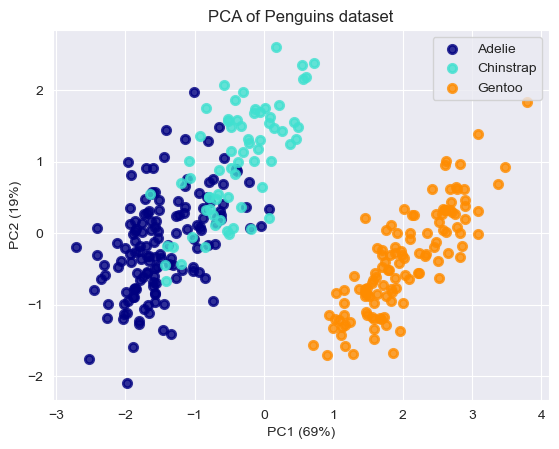

In [8]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, species in zip(colors, species_names):
    plt.scatter(X_r[y == species, 0], X_r[y == species, 1], color=color, alpha=.8, lw=lw,
                label=species)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PC1 (69%)')
plt.ylabel('PC2 (19%)')
plt.title('PCA of Penguins dataset')

plt.show()

## Top Trumps
`DinosaursTT.csv` contains data on Top Trumps cards.  

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sna
TTDino_df = pd.read_csv('DinosaursTT.csv')
TTDino_df.tail()

,Name,Height,Weight,Length,Killer Rating,Intelligence,Age
24,Suchomimus,4.0,4000,12.0,8,7,100
25,Velociraptor,1.0,15,2.0,9,10,85
26,Triceratops,3.0,5500,9.0,2,4,72
27,Tyrannosaurus rex,5.6,6000,12.0,9,9,67
28,Diplodocus,8.0,12000,27.0,0,2,150


In [10]:
y = TTDino_df.pop('Name').values
X = TTDino_df
X_scal = StandardScaler().fit_transform(X)
X.shape

(29, 6)

/opt/anaconda3/envs/AI/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


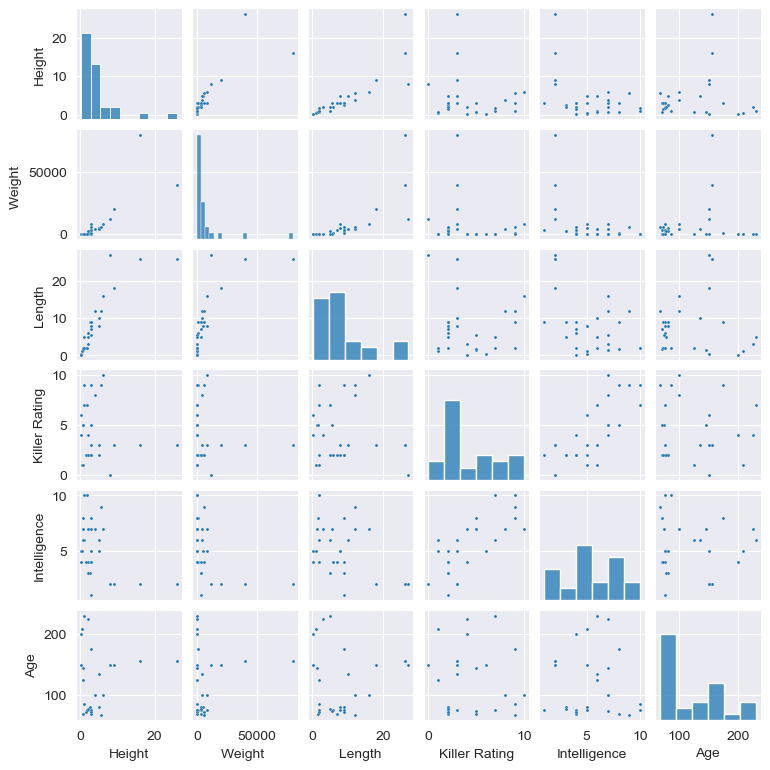

In [11]:
sna.pairplot(X,height=1.3, plot_kws=dict(s=5))

In [12]:
pcaDino = PCA(n_components=4)
X_r = pcaDino.fit(X_scal).transform(X_scal)
pcaDino.explained_variance_ratio_.round(2)

array([0.51, 0.23, 0.16, 0.04])

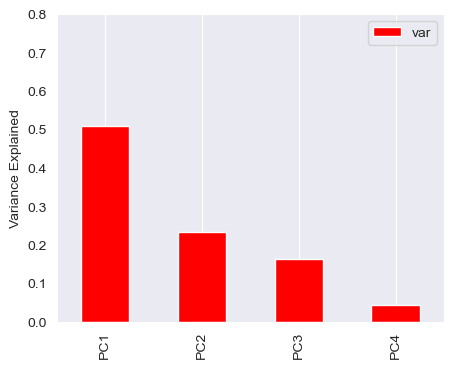

In [13]:
df = pd.DataFrame(pcaDino.explained_variance_ratio_, 
                  index=['PC1','PC2','PC3','PC4'],columns =['var'])

pl = df.plot.bar(color='red',figsize=(5,4))
pl.set_ylabel("Variance Explained")
pl.set_ylim([0,0.8])
pl.grid(axis='y')

In [14]:
pcaDino.components_[:2].round(2)

array([[ 0.51,  0.5 ,  0.5 , -0.24, -0.42,  0.09],
       [ 0.28,  0.23,  0.24,  0.73,  0.51,  0.12]])

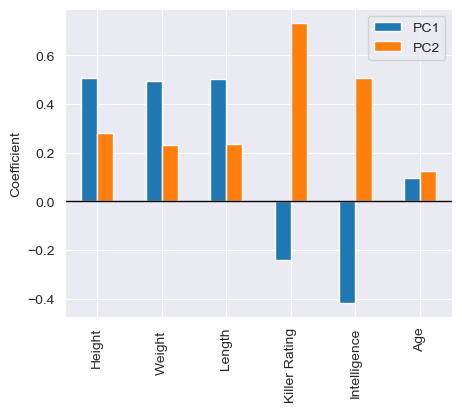

In [15]:
df = pd.DataFrame(pcaDino.components_[:2], index = ['PC1','PC2'], 
                  columns = TTDino_df.columns)
pl_PCs = df.T.plot.bar(figsize=(5,4))
pl_PCs.set_ylabel("Coefficient")
pl_PCs.axhline(0, color = 'black', linewidth = 1)

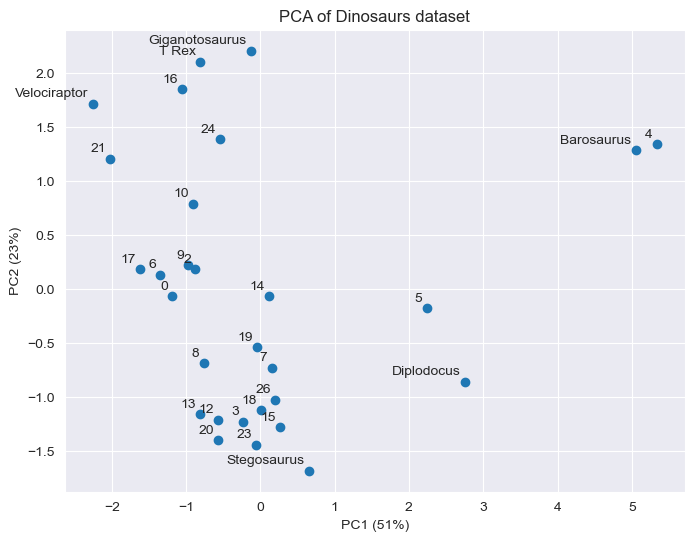

In [16]:
plt.figure(figsize=(8,6))
lw = 2
labels = list(range(len (y)))
labels[25]='Velociraptor'
labels[11]='Giganotosaurus'
labels[27]='T Rex'
labels[28]='Diplodocus'
labels[22]='Stegosaurus'
labels[1]='Barosaurus'

plt.scatter(X_r[:, 0], X_r[:, 1])

for label, xi, yi in zip(labels, X_r[:, 0], X_r[:, 1]):
    plt.annotate(
        label,
        xy=(xi, yi), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')

plt.xlabel('PC1 (51%)')
plt.ylabel('PC2 (23%)')
plt.title('PCA of Dinosaurs dataset')

plt.show()

## PCA from first principles

In [17]:
TTDino_df = pd.read_csv('DinosaursTT.csv')
TTDino_df.pop('Name')
Y_df = TTDino_df

In [18]:
# Applying N(0,1) scaling: subtract mean, divide by std deviation.
Z_df = (Y_df - Y_df.mean())/Y_df.std()
Z = Z_df.values
Z_T = Z.transpose()

In [19]:
C = Z_T.dot(Z)/(Z.shape[0]-1)
C.round(2)

array([[ 1.  ,  0.81,  0.85, -0.11, -0.42,  0.11],
       [ 0.81,  1.  ,  0.75, -0.15, -0.44,  0.15],
       [ 0.85,  0.75,  1.  , -0.11, -0.48,  0.06],
       [-0.11, -0.15, -0.11,  1.  ,  0.74,  0.02],
       [-0.42, -0.44, -0.48,  0.74,  1.  , -0.09],
       [ 0.11,  0.15,  0.06,  0.02, -0.09,  1.  ]])

In [20]:
ev, evec = np.linalg.eig(C)

In [21]:
ev.round(2)

array([3.06, 1.4 , 0.98, 0.12, 0.18, 0.26])

In [22]:
# Scale the eigenvectors
(ev/ev.sum()).round(2)

array([0.51, 0.23, 0.16, 0.02, 0.03, 0.04])

In [23]:
P = evec[:,0:2]
P

array([[ 0.50759272,  0.27939642],
       [ 0.49698819,  0.23322034],
       [ 0.5038397 ,  0.23727913],
       [-0.24027898,  0.7327682 ],
       [-0.41818578,  0.50897399],
       [ 0.09425811,  0.12345353]])

In [24]:
X_dash = Z.dot(P)

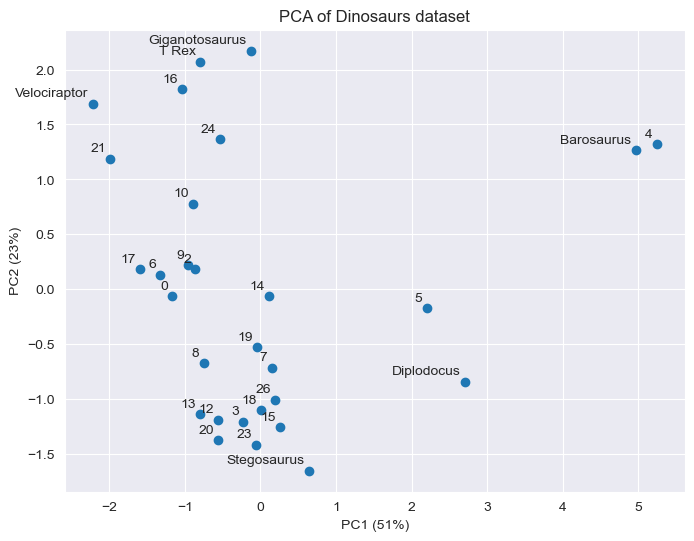

In [25]:
plt.figure(figsize=(8,6))
lw = 2
labels = list(range(len (y)))
labels[25]='Velociraptor'
labels[11]='Giganotosaurus'
labels[27]='T Rex'
labels[28]='Diplodocus'
labels[22]='Stegosaurus'
labels[1]='Barosaurus'

plt.scatter(X_dash[:, 0], X_dash[:, 1])

for label, xi, yi in zip(labels, X_dash[:, 0], X_dash[:, 1]):
    plt.annotate(
        label,
        xy=(xi, yi), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')

plt.xlabel('PC1 (51%)')
plt.ylabel('PC2 (23%)')
plt.title('PCA of Dinosaurs dataset')

plt.show()